In [4]:
#IMPORT NECESSRY LIBRARIES
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam,RMSprop, Adagrad
from keras.layers import BatchNormalization
from sklearn.metrics import classification_report,confusion_matrix
import tensorflow as tf
import cv2
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [16]:
#LOAD DATASET
labels = ['Negative', 'Positive']
img_size = 120
def read_images(data_dir):
    data = [] 
    for label in labels: 
        path = os.path.join(data_dir, label)
        class_num = labels.index(label)
        for img in os.listdir(path):
            try:
                img_arr = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                resized_arr = cv2.resize(img_arr, (img_size, img_size)) 
                data.append([resized_arr, class_num])
            except Exception as e:
                print(e)
    return np.array(data)

Dataset = read_images("C:\\Users\\Shaurya\\Downloads\\archive")

Text(0.5, 1.0, 'Number of Images')

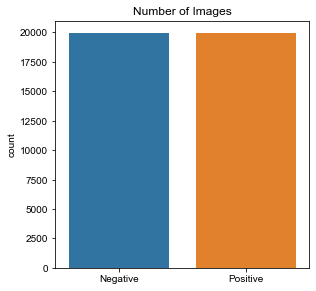

In [17]:
#VISUALIZING THE DATASET
Im = []
for i in Dataset:
    if(i[1] == 0):
        Im.append("Negative")
    elif(i[1] == 1):
        Im.append("Positive")

plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.set_style('darkgrid')
axl = sns.countplot(Im)
axl.set_title("Number of Images")

In [18]:
#NORMALISATION OF IMAGE DATA
x = []
y = []

for feature, label in Dataset:
    x.append(feature)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 1)
x = x / 255
y = np.array(y)

(-0.5, 119.5, 119.5, -0.5)

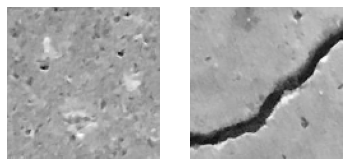

In [19]:
plt.subplot(1, 2, 1)
plt.imshow(x[1000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x[30000].reshape(img_size, img_size), cmap='gray')
plt.axis('off')

In [21]:
#CNN MODEL
model = Sequential()
model.add(Conv2D(64,3,padding="same", activation="relu", input_shape = x.shape[1:]))
model.add(MaxPool2D())

model.add(Conv2D(64, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Conv2D(128, 3, padding="same", activation="relu"))
model.add(MaxPool2D())

model.add(Flatten())
model.add(Dense(256,activation="relu"))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(2, activation="softmax"))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 120, 120, 64)      640       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 60, 60, 64)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 30, 30, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 15, 15, 128)     

In [22]:
#MODEL TRAINING
opt = Adam(lr=1e-5)

model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"]) 

history = model.fit(x, y, epochs = 15, batch_size = 128, validation_split = 0.25, verbose=1)

Epoch 1/15
235/235 [==============================] - 318s 1s/step - loss: 0.2652 - accuracy: 0.8990 - val_loss: 0.4124 - val_accuracy: 0.9541
Epoch 2/15
235/235 [==============================] - 307s 1s/step - loss: 0.0916 - accuracy: 0.9738 - val_loss: 0.0992 - val_accuracy: 0.9749
Epoch 3/15
235/235 [==============================] - 302s 1s/step - loss: 0.0666 - accuracy: 0.9802 - val_loss: 0.0679 - val_accuracy: 0.9715
Epoch 4/15
235/235 [==============================] - 290s 1s/step - loss: 0.0543 - accuracy: 0.9838 - val_loss: 0.0607 - val_accuracy: 0.9744
Epoch 5/15
235/235 [==============================] - 309s 1s/step - loss: 0.0466 - accuracy: 0.9862 - val_loss: 0.0771 - val_accuracy: 0.9709
Epoch 6/15
235/235 [==============================] - 315s 1s/step - loss: 0.0404 - accuracy: 0.9886 - val_loss: 0.0912 - val_accuracy: 0.9656
Epoch 7/15
235/235 [==============================] - 310s 1s/step - loss: 0.0357 - accuracy: 0.9900 - val_loss: 0.0829 - val_accuracy: 0.9704

In [24]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


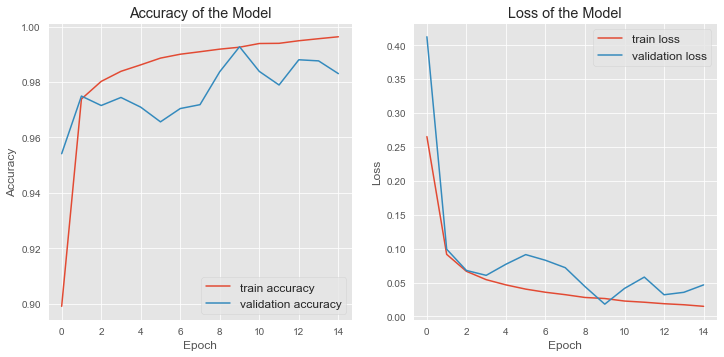

In [25]:
#GRAPHS
plt.figure(figsize=(12, 12))
plt.style.use('ggplot')
plt.subplot(2,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy of the Model')
plt.ylabel('Accuracy', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right', prop={'size': 12})

plt.subplot(2,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss of the Model')
plt.ylabel('Loss', fontsize=12)
plt.xlabel('Epoch', fontsize=12)
plt.legend(['train loss', 'validation loss'], loc='best', prop={'size': 12})

In [36]:
#CLASSIFICATION REPORT
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions on the data using the model
y_pred = model.predict(x)

# Convert predicted probabilities to class labels
y_pred = np.argmax(y_pred, axis=1)

# Generate classification report and confusion matrix
class_names = ['No Crack', 'Crack']
report = classification_report(y, y_pred, target_names=class_names)
matrix = confusion_matrix(y, y_pred)

print("Classification Report:")
print(report)
print("Confusion Matrix:")
print(matrix)

Classification Report:
              precision    recall  f1-score   support

    No Crack       0.99      1.00      0.99     20000
       Crack       1.00      0.99      0.99     20000

    accuracy                           0.99     40000
   macro avg       0.99      0.99      0.99     40000
weighted avg       0.99      0.99      0.99     40000

Confusion Matrix:
[[19973    27]
 [  248 19752]]
